In [1]:
import numpy as np
import math
from datascience import *
# These lines set up the plotting functionality and formatting.
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [71]:
wages_actuary = Table.read_table('Data USA - Bar Chart of Wage Distribution for Actuaries-1.csv').drop([1,2,4,6])\
    .relabeled("num_ppl","# of people in workforce").relabeled("wage_bin_name","Wage bin")

wages_pop = Table.read_table('Data USA - Bar Chart of Wage Distribution for Actuaries-2.csv').drop([1,2,4,6])\
    .relabeled("wage_bin_name","Wage bin").relabeled("num_ppl","# of people in workforce")
    

age = Table.read_table('Data USA - Line Plot of Age by Gender for Actuaries.csv').drop([1,2,4,7])\
.relabeled("num_ppl","# of people in workforce").relabeled("sex_name","Gender")
                                                                                                                        
                                                                                                                        
age_male = Table.read_table('Data USA - Line Plot of Age by Gender for Actuaries.csv').take(range(0,56)).drop([1,2,4,7])\
    .relabeled("num_ppl","# of people in workforce").relabeled("sex_name","Gender")
                                                                                                                                                                                             
                                                                                                  
age_female = Table.read_table('Data USA - Line Plot of Age by Gender for Actuaries.csv').take(range(57,104)).drop([1,2,4,7])\
    .relabeled("num_ppl","# of people in workforce").relabeled("sex_name","Gender")

major = Table.read_table('Data USA - Tree Map of Majors for Actuaries.csv').drop([1,2,4,5,6,8,9])\
    .relabeled("num_ppl","# of people in workforce").relabeled("cip_name", "College Degree")
        

gender_with_degree = Table.read_table("Data USA - Bar Chart of Gender for Actuaries.csv").drop([2,4,6]).relabeled("cip_name", "College Degree")\
    .relabeled("num_ppl","# of people in workforce").relabeled("sex_name","Gender")
                                                                                                                  
highest_paid = Table.read_table("Data USA - Bar Chart of Highest Paid for Actuaries.csv").drop([2,3,4,6,8]).relabeled(1,"Industry")\
    .relabeled("num_ppl","# of people in workforce").relabeled("avg_wage","Average salary")
                                                                                                                                              
university = Table.read_table("Data USA - Tree Map of Universities for Actuaries.csv").drop([2,4])\
    .relabeled("grads_total","Total Graduates").relabeled("university_name", "University").relabeled("cip_name", "Degrees awards")
                                                                                                            
university                                                                                         

year,Degrees awards,University,Total Graduates
2014,Computer and Information Sciences and Support Services,Corcoran College of Art and Design,4
2014,Computer and Information Sciences and Support Services,Winter Park Tech,28
2014,Computer and Information Sciences and Support Services,Withlacoochee Technical Institute,12
2014,Computer and Information Sciences and Support Services,Fortis Institute-Baltimore,11
2014,Computer and Information Sciences and Support Services,Alabama A & M University,17
2014,Computer and Information Sciences and Support Services,University of Alabama at Birmingham,50
2014,Computer and Information Sciences and Support Services,University of Alabama in Huntsville,73
2014,Computer and Information Sciences and Support Services,Alabama State University,46
2014,Computer and Information Sciences and Support Services,The University of Alabama,56
2014,Computer and Information Sciences and Support Services,Central Alabama Community College,4


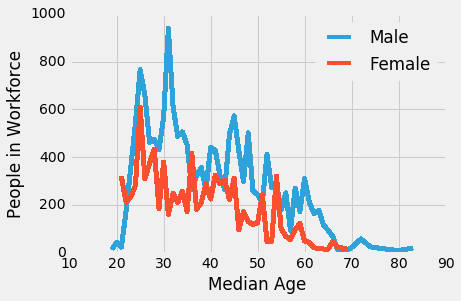

In [53]:
## The median age of Actuaries is 38.7, and Male employees are generally 0.622 years older
## than than their Female counterparts.
#gender.drop([1,2]).relabeled("People in workforce sum","Labors in the workforce")
# the histogram of the data
line, = plt.plot(age_male.column(2), age_male.column(3), '-', label='Male')
line.set_antialiased(False)
line, = plt.plot(age_female.column(2), age_female.column(3), '-', label='Female')
line.set_antialiased(False)
plt.xlabel('Median Age')
plt.ylabel('People in Workforce')
plt.legend(loc= 'upper right')

In [56]:
## The highest paid industries for Actuaries, by average wage, are Management, scientific & technical ## services; Securities, commodities, funds, trusts & other financial investments; and Insurance ## related activities.
highest_paid.sort("Average salary",descending = True)

year,Industry,# of people in workforce,Average salary
2014,"Management, scientific & technical consulting services",5266,151097
2014,"Securities, commodities, funds, trusts & other financial ...",732,144705
2014,Insurance carriers & related activities,22967,123618
2014,Nondepository credit & related activities,503,84288.7


In [57]:
age_female

year,Gender,age,# of people in workforce
2014,Female,21,319
2014,Female,22,212
2014,Female,23,234
2014,Female,24,282
2014,Female,25,609
2014,Female,26,310
2014,Female,27,373
2014,Female,28,433
2014,Female,29,185
2014,Female,30,380


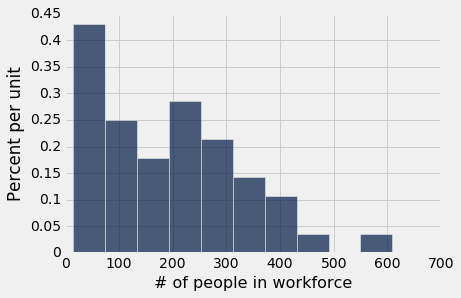

In [59]:
age_female.hist("# of people in workforce")

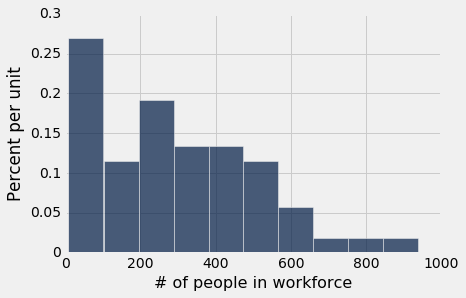

In [60]:
age_male.hist("# of people in workforce")

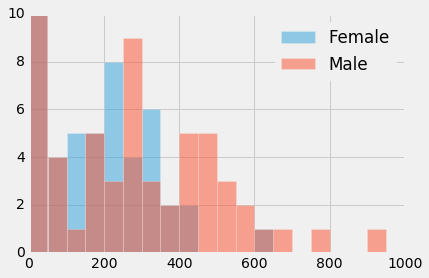

In [61]:
#Distribution of # of Female and Male in workforce
female = list(age_female.column(3))
male = list(age_male.column(3))
plt.hist(female, bins= np.arange(0,1000,50), alpha=0.5, label='Female')
plt.hist(male, bins= np.arange(0,1000,50), alpha=0.5, label='Male')
plt.legend(loc= 'upper right')
plt.show()

In [64]:
university

year,College Degree,University,Total Graduates
2014,Computer and Information Sciences and Support Services,Corcoran College of Art and Design,4
2014,Computer and Information Sciences and Support Services,Winter Park Tech,28
2014,Computer and Information Sciences and Support Services,Withlacoochee Technical Institute,12
2014,Computer and Information Sciences and Support Services,Fortis Institute-Baltimore,11
2014,Computer and Information Sciences and Support Services,Alabama A & M University,17
2014,Computer and Information Sciences and Support Services,University of Alabama at Birmingham,50
2014,Computer and Information Sciences and Support Services,University of Alabama in Huntsville,73
2014,Computer and Information Sciences and Support Services,Alabama State University,46
2014,Computer and Information Sciences and Support Services,The University of Alabama,56
2014,Computer and Information Sciences and Support Services,Central Alabama Community College,4


In [65]:
#Explore the number of degrees awarded by each college and university in the 5 most common majors:
university.group(1,sum).drop([1,2])

College Degree,Total Graduates sum
Business,780914
Computer and Information Sciences and Support Services,159143
Engineering,154963
Math & Statistics,36350
Social Sciences,199424


In [66]:
university.where("University", "University of California-Berkeley")

year,College Degree,University,Total Graduates
2014,Computer and Information Sciences and Support Services,University of California-Berkeley,351
2014,Engineering,University of California-Berkeley,1666
2014,Math & Statistics,University of California-Berkeley,509
2014,Social Sciences,University of California-Berkeley,1878
2014,Business,University of California-Berkeley,899


In [72]:
def most_degreeaward(year):
    return university.where('year', year).sort('Degrees awards', descending=True).show(8)
most_degreeaward(2014)

#This lead me to believe that these universities offers more online classes to lead to a degree


year,Degrees awards,University,Total Graduates
2014,Social Sciences,Georgia Military College,46
2014,Social Sciences,University of North Texas at Dallas,57
2014,Social Sciences,Arizona State University-Skysong,163
2014,Social Sciences,Central Georgia Technical College,3
2014,Social Sciences,Texas A & M University-Central Texas,18
2014,Social Sciences,Northeastern University Global Network,10
2014,Social Sciences,University of North Georgia,87
2014,Social Sciences,Georgia Regents University,51


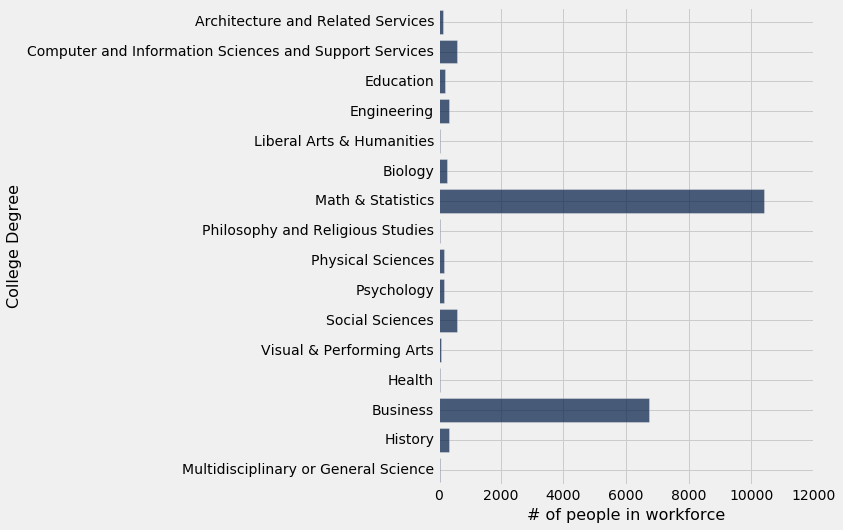

In [73]:
major.select([1,2]).barh('College Degree')

In [75]:
# Analysis
print('Number of individuals:', sum(gender_with_degree.column(3)))
print('Number of unique', gender_with_degree.group(1).column(0).item(0), 'values:', gender_with_degree.group(1,sum).column(3).item(0))
print('Number of unique', gender_with_degree.group(1).column(0).item(1), 'values:', gender_with_degree.group(1,sum).column(3).item(1))
print('Number of unique', gender_with_degree.group(1).column(0).item(2), 'values:', gender_with_degree.group(1,sum).column(3).item(2))
print('Number of unique', gender_with_degree.group(1).column(0).item(3), 'values:', gender_with_degree.group(1,sum).column(3).item(3))
print('Number of unique', gender_with_degree.group(1).column(0).item(4), 'values:', gender_with_degree.group(1,sum).column(3).item(4))

Number of individuals: 19515312
Number of unique Business values: 9997027
Number of unique Computer and Information Sciences and Support Services values: 1642351
Number of unique Engineering values: 3792716
Number of unique Math & Statistics values: 641072
Number of unique Social Sciences values: 3442146


In [77]:
genders_by_major = gender_with_degree.pivot("College Degree","Gender","# of people in workforce",sum)
genders_by_major

Gender,Business,Computer and Information Sciences and Support Services,Engineering,Math & Statistics,Social Sciences
Female,4415928,408543,551436,248930,1514919
Male,5581099,1233808,3241280,392142,1927227


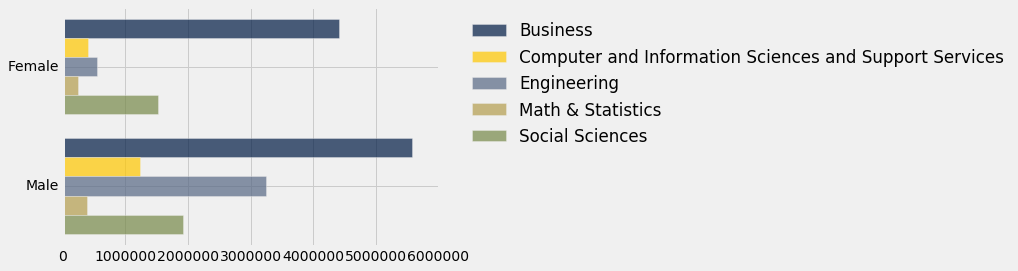

In [78]:
genders_by_major.barh(0)

In [79]:
gender_with_degree

year,College Degree,Gender,# of people in workforce
2014,Social Sciences,Female,1514919
2014,Social Sciences,Male,1927227
2014,Computer and Information Sciences and Support Services,Female,408543
2014,Computer and Information Sciences and Support Services,Male,1233808
2014,Engineering,Female,551436
2014,Engineering,Male,3241280
2014,Math & Statistics,Female,248930
2014,Math & Statistics,Male,392142
2014,Business,Female,4415928
2014,Business,Male,5581099


In [85]:
diffs = gender_with_degree.select([1,2,3]).group('College Degree', np.diff).drop(1)\
    .relabeled("# of people in workforce diff","Gender difference by college major")
diffs = Table().with_columns(["College degree",diffs.column(0),
                              "Gender difference by college major", np.concatenate(diffs.column(1))])
diffs

College degree,Gender difference by college major
Business,1165171
Computer and Information Sciences and Support Services,825265
Engineering,2689844
Math & Statistics,143212
Social Sciences,412308


In [93]:
def proportions(table, count_labels):
    for label in count_labels:
        column = table.column(label)
        table = table.with_column(label, column / sum(column))
        table.set_format(label, PercentFormatter(0))
    return table


genders_by_major
proportions(genders_by_major, ["Business","Computer and Information Sciences and Support Services","Engineering",\
                               "Math & Statistics", "Social Sciences"])

Gender,Business,Computer and Information Sciences and Support Services,Engineering,Math & Statistics,Social Sciences
Female,44%,25%,15%,39%,44%
Male,56%,75%,85%,61%,56%


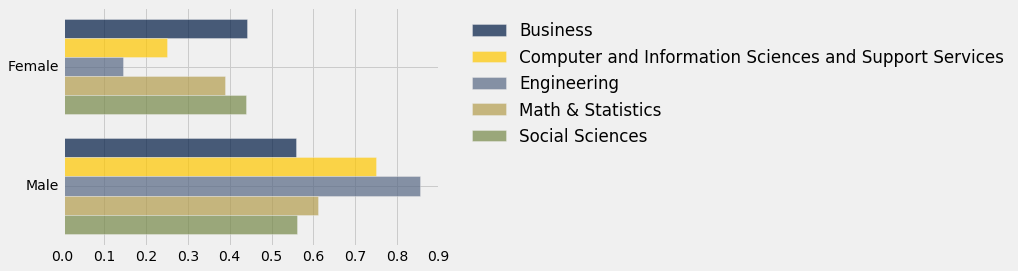

In [94]:
proportions(genders_by_major, ["Business","Computer and Information Sciences and Support Services","Engineering",\
                               "Math & Statistics", "Social Sciences"]).barh(0)

In [98]:
def tvd(t, conditions, values):
    """Compute the total variation distance
    between proportions of values under two conditions.
    t (Table) -- a table
    conditions (str) -- a column label in t; should have only two categories
    values (str) -- a column label in t
    """
    counts = t.pivot(conditions, values)
    categoryA = np.array(counts.labels).item(1)
    categoryB = np.array(counts.labels).item(2)
    props = proportions(counts, [categoryA, categoryB])
    a = props.column(1)
    b = props.column(2)
    return 0.5*sum(abs(a - b))
tvd(age, 'Gender', '# of people in workforce')

0.82142857142857062

In [99]:
def max_deviation(t, conditions, values):
    """Compute the maximum difference for any value
    between proportions of values under two conditions.
    t (Table) -- a table
    conditions (str) -- a column label in t; should have only two categories
    values (str) -- a column label in t
    8
    """
    counts = t.pivot(conditions, values)
    categoryA = np.array(counts.labels).item(1)
    categoryB = np.array(counts.labels).item(2)
    props = proportions(counts, [categoryA, categoryB])
    a = props.column(1)
    b = props.column(2)
    return max(abs(a - b))
max_deviation(age, 'Gender', '# of people in workforce')

0.041666666666666664

In [ ]:
def permutation_test(original, conditions, values, f):
    """
    Perform a permutation test of whether
    the distribution of values for two conditions
    is the same in the population,
    using the function f to compute the test statistic.
    original is a Table with two columns. The value of the argument
    conditions is the name of one column, and the value of the argument
    values is the name of the other column. The conditions table should
    have only 2 possible values corresponding to 2 categories in the
    data.
    The values column is shuffled many times, and the data are grouped
    according to the conditions column. The test statistic
    between the proportions values in the 2 categories is computed.
    Then we draw a histogram of all those statistics. This shows us
    how the statistic between the two distributions would vary from
    chance, regardless of the conditions.
    """
    # Note: 200 repetitions is a little low. We've used that number
    # so you don't have to wait too long when you run your code, but
    # if you're concerned about the accuracy of the resulting P-value,
    # feel free to increase it.
    repetitions = 200
    stats = []
    for i in np.arange(repetitions):
    shuffled = original.sample() # SOLUTION
    combined = Table().with_columns([
    conditions, original.column(conditions),
    values, shuffled.column(values)
    ])
    stats.append(f(combined, conditions, values)) # SOLUTION
    observation = f(original, conditions, values) # SOLUTION
    p_value = np.count_nonzero(stats >= observation) / repetitions # SOLUTION
    print("Observation:", observation)
    print("Empirical P-value:", p_value)
Table([stats], ['Empirical distribution']).hist()